In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Importing Libraries to handle dataset
import pandas as pd, numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Uploading files from google.colab
from google.colab import files
uploaded = files.upload()

Saving Leads.csv to Leads.csv


In [5]:
import io #this is for using file uploaded to google colab

##**Step 1: Reading & Understanding the Data**

In [176]:
# Importing dataset 'Leads.csv'
lead=pd.read_csv(io.BytesIO(uploaded['Leads.csv']))
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [177]:
# Dimensions of the initial dataset
lead.shape

(9240, 37)

We have 9240 rows & 37 columns in our dataset.

In [178]:
# Displaying all columns present in the dataset
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [179]:
# Analysing the data type and non-null value count of each column
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

So, we have 4 float, 3 int, & 30 object datatypes.

In [180]:
#to get information like mean, mode etc of numerical datatypes.
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


##**Step 2: Data Cleaning**

In [181]:
# Displaying number of null values in each column
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [182]:
# Replacing the 'Select' values with 'np.NaN'(Null)values through out the dataset 
n=9240
for i in lead.columns:
    lead[i]=lead[i].replace('Select',np.NaN)

In [183]:
# Checking the revised number of missing values in each column
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [184]:
# Checking the percentage of missing values for the revised columns
round(100*(lead.isnull().sum()/len(lead.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

We do see some columns with high null percentage. Hence we'll drop all columns with null percentage > 39%. These are:

* Lead Profile
* City
* Asymmetrique Activity Index
* Asymmetrique Profile Index
* Asymmetrique Activity Score
* Asymmetrique Profile Score
* How did you hear about X Education
* Lead Quality

In [185]:
# Dropping columns which are having percentage of missing values > 39%
null_value_cols=['Lead Profile','City','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','How did you hear about X Education','Lead Quality']
for col in null_value_cols:
  lead.drop(col, axis=1, inplace=True)


We also see there are certain columns that are score variables. These are :
* Tags
* Lead Quality
* Lead Profile
* Asymmetrique Activity Index
* Asymmetrique Profile Index
* Asymmetrique Activity Score
* Asymmetrique Profile Score

These are not required. Since we have already dropped all these columns above due to high missing percentage, we'll drop Tags column as well.

In [186]:
lead.drop('Tags',axis=1,inplace=True)

In [187]:
#checking null percentage again
round(100*(lead.isnull().sum()/len(lead.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [188]:
# Analyse the statistics of all continuous variable columns
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820
std,23405.995698,0.486714,4.854853,548.021466,2.161418
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


In [189]:
# Displaying the remaining columns 
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [190]:
# Displaying the dimensions of the dataset
lead.shape

(9240, 28)

In [191]:
#we are left with 28 columns. checking  datatypes of all remaining columns
lead.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                                          object
Newspaper Article              

In [192]:
#so we have 22 columns of obj type (excluding Prospect ID) that we'll consider as categorical column. checking their unique value counts
cat_cols=['Lead Origin','Lead Source','Do Not Email','Do Not Call','Last Activity','Country','Specialization','What is your current occupation','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Last Notable Activity']
for cols in cat_cols:
  print (cols)
  print (lead[cols].value_counts())
  print ('*********************************\n')

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
*********************************

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
welearnblog_Home        1
youtubechannel          1
WeLearn                 1
NC_EDM                  1
testone                 1
blog                    1
Pay per Click Ads       1
Name: Lead Source, dtype: int64
*********************************

Do Not Email
No     8506
Yes     734
Name: Do Not Email, dtype: int64
*********************************

Do Not Call
No     9238
Yes    

**Below columns have lot of categories with low unique values. So, will make it others**.
* Lead Source
* Last Activity
* Last Notable Activity
* Lead Origin







In [193]:
#changing all categories of col Lead Source which have <150 unique values
lead.loc[(lead["Lead Source"].isin(['Welingak Website','Referral Sites','Facebook','bing','google','Click2call','Live Chat','Press_Release','Social Media','WeLearn','youtubechannel','welearnblog_Home','Pay per Click Ads','NC_EDM','blog','testone'])) , "Lead Source"] = "Others"
lead['Lead Source'].value_counts()
 


Google            2868
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Others             350
Name: Lead Source, dtype: int64

In [194]:
#changing all categories of col Last Activity which have <400 unique values
lead.loc[(lead["Last Activity"].isin(['Email Bounced','Email Link Clicked','Form Submitted on Website','Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront','View in browser link Clicked','Email Received','Email Marked Spam','Visited Booth in Tradeshow','Resubscribed to emails'])) , "Last Activity"] = "Others"
lead['Last Activity'].value_counts()

Email Opened               3437
SMS Sent                   2745
Olark Chat Conversation     973
Others                      914
Page Visited on Website     640
Converted to Lead           428
Name: Last Activity, dtype: int64

In [195]:
#changing all categories of col Lead Notable Activity which have <500 unique values
lead.loc[(lead["Last Notable Activity"].isin(['Page Visited on Website','Olark Chat Conversation','Email Link Clicked','Email Bounced','Unsubscribed','Unreachable','Had a Phone Conversation','Email Marked Spam','Resubscribed to emails','View in browser link Clicked','Email Received','Approached upfront','Form Submitted on Website'])) , "Last Notable Activity"] = "Others"
lead['Last Notable Activity'].value_counts()


Modified        3407
Email Opened    2827
SMS Sent        2172
Others           834
Name: Last Notable Activity, dtype: int64

In [196]:
#changing all categories of col Lead Origin which have <800 frequences
lead.loc[(lead["Lead Origin"].isin(["Lead Add Form","Lead Import","Quick Add Form"])),"Lead Origin"]="Others"
lead["Lead Origin"].value_counts()

Landing Page Submission    4886
API                        3580
Others                      774
Name: Lead Origin, dtype: int64

**Below columns have values skewed on one end. We'll drop them**
* Do Not Email
* Do Not Call
* Through Recommendations
* Digital Advertisement
* Newspaper
* X Education Forums
* Newspaper Article
* Search
* What matters most to you in choosing a course
* Country
* What is the current occupation




In [197]:
# all these four columns like Lead Source, Do not call, Do not email & Lead Origin are heavily skewed columns. Hence we'll drop it.
skewed_cols=['What is your current occupation','Do Not Email','Do Not Call','Through Recommendations','Digital Advertisement','Newspaper','X Education Forums','Newspaper Article','Search','What matters most to you in choosing a course','Country']
for col in skewed_cols:
  lead = lead.drop(col, axis=1)

**Below columns have only one unique values- either yes or no. So, they are also skewed towrds one category of values. Hence dropping them.**

* 'I agree to pay the amount through cheque'
* 'Get updates on DM Content'
* 'Update me on Supply Chain Content'
* 'Receive More Updates About Our Courses'
* 'Magazine'


In [198]:
skewed_cols2=['I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content','Receive More Updates About Our Courses','Magazine']
for col in skewed_cols2:
  lead=lead.drop(col,axis=1)

In [199]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,NaN,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,NaN,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Media and Advertising,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,NaN,No,Modified


In [200]:
#to check final no. of rows & cols
lead.shape

(9240, 12)

We are left with 9240 rows & 12 columns.

###**Checking percentage of missing values.**

In [201]:
# Finding the percentage of missing values of all the columns
round(100*(lead.isnull().sum()/len(lead.index)),2)

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Specialization                            36.58
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

We see that below columns have less percentage of missing values.

*   Lead Source- Categorical Column
*   TotalVisits- Numerical Column
*   Page Views Per Visit - Numerical Column
*   Last Activity - Categorical Column

**Handling null values of categorical column**

In [202]:
# Finding the frequencies of each category of a categorical column, to impute the null values
n=["Lead Source","Last Activity"]
for i in n:
  print(lead[i].value_counts())
  print("\n************************\n")

Google            2868
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Others             350
Name: Lead Source, dtype: int64

************************

Email Opened               3437
SMS Sent                   2745
Olark Chat Conversation     973
Others                      914
Page Visited on Website     640
Converted to Lead           428
Name: Last Activity, dtype: int64

************************



In [203]:
# Imputing the null values of the categorical columns Lead Source and Last Activity with their most frequent value
lead["Lead Source"]=lead["Lead Source"].fillna("Google")
lead["Last Activity"]=lead["Last Activity"].fillna("Email Opened")


**Handling null values of numerical columns**

In [204]:
#checking mean of numerical columns which had low null %
lead_mean= lead[['TotalVisits','Page Views Per Visit']].mean()
lead_mean

TotalVisits             3.445238
Page Views Per Visit    2.362820
dtype: float64

In [205]:
#checking median of numerical columns which had low null %
lead_median= lead[['TotalVisits','Page Views Per Visit']].median()
lead_median

TotalVisits             3.0
Page Views Per Visit    2.0
dtype: float64

In [206]:
# Since both mean & mode are quite close. we'll impute the null values of Numerical Columns 
#TotalVisits and Page Views Per Visit columns with the mean values

lead["TotalVisits"]=lead["TotalVisits"].fillna(3.445238)
lead["Page Views Per Visit"]=lead["Page Views Per Visit"].fillna(2.362820)

In [207]:
# Again checking the percentage of missing values of all the columns
round(100*(lead.isnull().sum()/len(lead.index)),2)

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.00
Converted                                  0.00
TotalVisits                                0.00
Total Time Spent on Website                0.00
Page Views Per Visit                       0.00
Last Activity                              0.00
Specialization                            36.58
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

**Handling Rows with high null percentage**

We see Specialization column has high null percentage. So, we'll impute unecessary rows in this column that are causing high null percentage with 'missing'

In [208]:
# Here we replacing the missing values with 'Missing'
lead["Specialization"]=lead["Specialization"].fillna("Missing")

In [209]:
# checking column-wise null percentages again
round(100*(lead.isnull().sum()/len(lead.index)),2)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

Looks good now as all columns have zero null values. (Though we need to handle the category 'Missing' in Specialization separately.)

In [210]:
# Dimensions of the final dataset obtained after data cleaning
lead.shape

(9240, 12)

In [211]:
# Percentage of rows retained after data cleaning
(lead.shape[0]/9240)*100

100.0

In [212]:
#checking dataset again
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Missing,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Missing,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Media and Advertising,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Missing,No,Modified


In [213]:
#checking columns left
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

So, we have all the rows (9240) right now & 12 columns. Data cleaning is complete. Moving on to data visualisation part to check correralations & outliers.

##**Step 3: Data Visualisation**

Here, we'll spend some time in understanding the data visually. We'll also identify if some predictors directly have a strong association with the outcome variable. We'll visualise our data using matplotlib and seaborn.

So, as our dataset looks cleaner now, we'll set below variables as the predictor(independent) variables (x):
*  Lead Origin
*  Lead Source
*  TotalVisits
*  Total Time Spent on Website
*  Page Views Per Visit
*  Last Activity
*  Specialization
*  Tags
*  A free copy of Mastering The Interview
*  Last Notable Activity

and **converted** as Target variable(y). Not considering Lead Number & Prospect ID because they are uniquely identifying the record.

In [214]:
#visualising numerical columns
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
lead.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820
std,23405.995698,0.486714,4.818723,548.021466,2.145333
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000


Ignoring Lead Number, analysis of all other independent numerical variables: 
* TotalVisits:all values are fine till 99 percentile but maximum value is 251.00. This is clearly an outier.
* Total Time Spent on Website: values are fine & gradually increasing
* Page Views Per Visit- values are gradually increasing till 99th percentile & max value at 55. So this is an outlier.

So we need to handle those. Hence visualising them on plots.

###**Visualising Numeric Variables**


Plotting all the numeric variables with target variable, *converted*

we have already imported matplot & seaborn libraries at the beginning of the dase staudy.

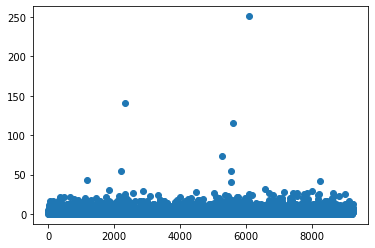

In [215]:
#checking values of column TotalVisits visually on scatter plot
plt.scatter(lead.index,lead['TotalVisits'])
plt.show()

**Most of the values of *TotalVisits* lie between 0 to 50. We do have a value at 250 thats clearly an outlier.**

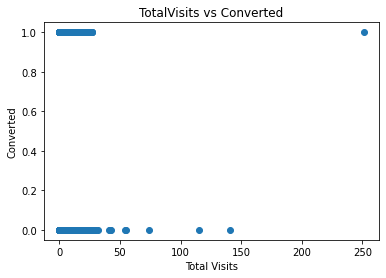

In [216]:
# Creating scatter plot for TotalVisits vs Converted column
plt.scatter(lead['TotalVisits'], lead['Converted'])
plt.xlabel("Total Visits")
plt.ylabel("Converted")
plt.title("TotalVisits vs Converted")
plt.show()

**there's no proper relation seen here, due to outliers**

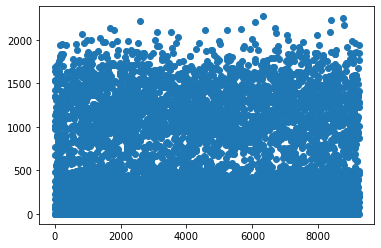

In [217]:
#checking values of column Total Time Spent on Website visually on scatter plot
plt.scatter(lead.index,lead['Total Time Spent on Website'])
plt.show()

**It doesn't seem there are outlier in *Total Time Spent on Website* column. It looks like its uniformly distributed. Theres no clear patter seen**

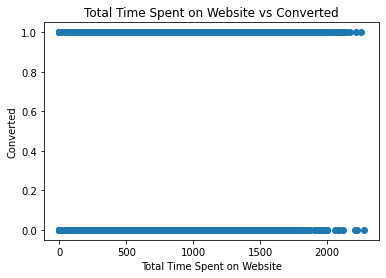

In [218]:
# Creating scatter plot for Total Time Spent on Website	vs Converted column
plt.scatter(lead['Total Time Spent on Website'], lead['Converted'])
plt.xlabel("Total Time Spent on Website")
plt.ylabel("Converted")
plt.title("Total Time Spent on Website vs Converted")
plt.show()

**it shows a uniformly increasing pattern here. As total time spent on website is increasing, the converted value is also moving towards**

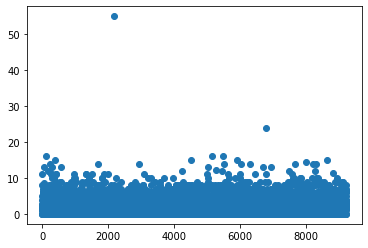

In [219]:
#checking values of column Page Views Per Visit visually on scatter plot
plt.scatter(lead.index,lead['Page Views Per Visit'])
plt.show()

**Most of the values of *Page Views Per Visit* lie within range 0 to 20. Howvever, we do see outliers above 20 & 50.**

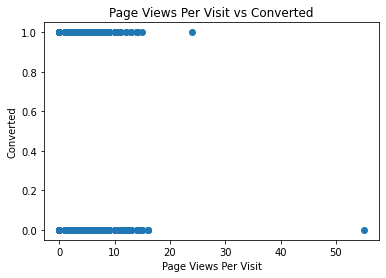

In [220]:
# Creating scatter plot for Page Views Per Visit	vs Converted column
plt.scatter(lead['Page Views Per Visit'], lead['Converted'])
plt.xlabel("Page Views Per Visit")
plt.ylabel("Converted")
plt.title("Page Views Per Visit vs Converted")
plt.show()

It does show more page views resulting more converted values 1. But we'll give proper relationship after outliers are treated.

###**Outlier Treatment**

We saw outliers in two columns *TotalVisits* & *Page Views per visit*. Since thei values remain fine till 99 quantile, we are performing capping at 99 quantile to handle outliers.

In [221]:
#Capping 'TotalVisits' at upper end at quantile 0.99
q4 = lead['TotalVisits'].quantile(0.99)
lead['TotalVisits'][lead['TotalVisits']>=q4] = q4

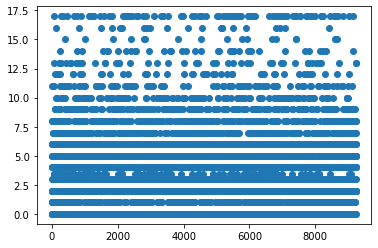

In [222]:
#checking values of column TotalVisits visually on scatter plot
plt.scatter(lead.index,lead['TotalVisits'])
plt.show()

It looks better now. Data is uniformly distributed.

In [223]:
#Capping 'Page Views Per Visit' at upper end at quantile 0.99
q4 = lead['Page Views Per Visit'].quantile(0.99)
lead['Page Views Per Visit'][lead['Page Views Per Visit']>=q4] = q4

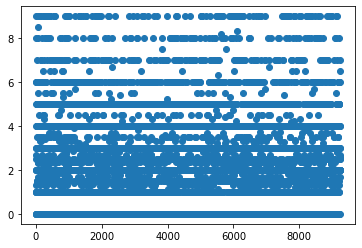

In [224]:
#checking values of column Page Views Per Visit visually on scatter plot again
plt.scatter(lead.index,lead['Page Views Per Visit'])
plt.show()

It looks better now. Data is uniformly distributed.

In [225]:
#visualising numerical columns again to see change
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
lead.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.334415,487.698268,2.334429
std,23405.995698,0.486714,3.228244,548.021466,1.970937
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000


Data looks good now.There are no outliers seen

#### Visualisation of categorical variables

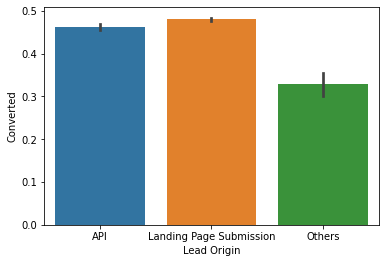

In [226]:
# Visualising categorical variables using boxplots
sns.barplot(x ='Lead Origin', y ='Converted', data =lead, estimator = np.std)

We see Landing Page submission has highest impact on lead getting converted. Its matches our business undertsnaing as well, because it means if a person is genuinely interested, he'll need more information & will fill & submit the form.

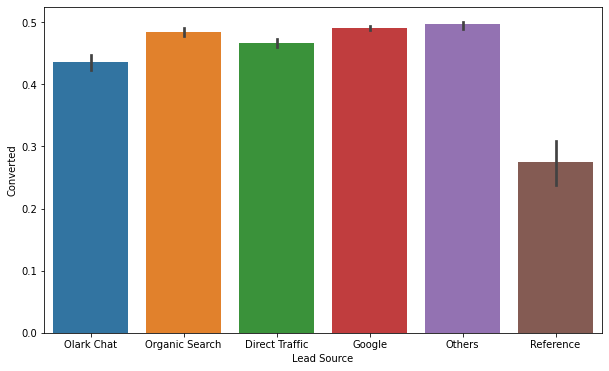

In [227]:
plt.figure(figsize = (10,6))
sns.barplot(x ='Lead Source', y ='Converted', data =lead, estimator = np.std)

All Lead sources seem to have a similar impact on lead converstion, though through reference its low.

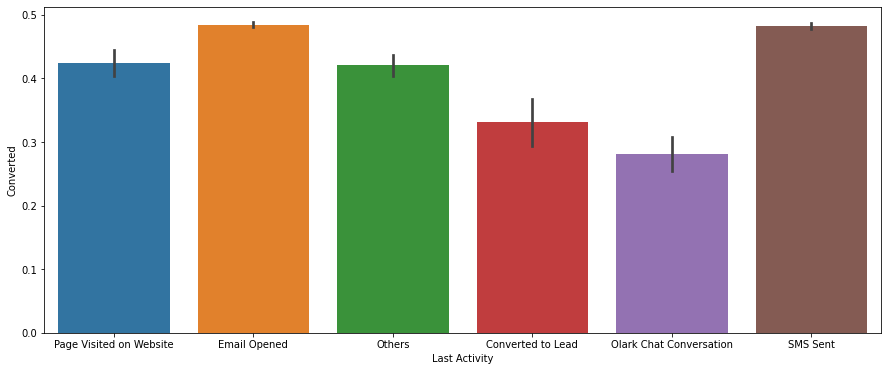

In [228]:
plt.figure(figsize = (15,6))
sns.barplot(x ='Last Activity', y ='Converted', data =lead, estimator = np.std)

Talking about student last activity, we see emails & sms play an important role in lead conversation. Because there is a flow of conversation going on here with the company.

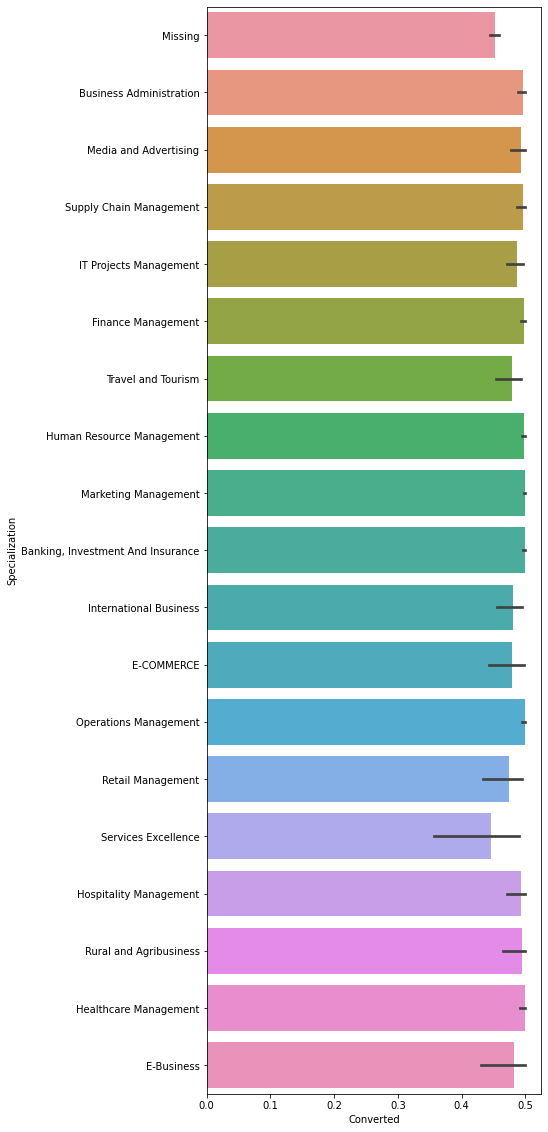

In [229]:
plt.figure(figsize = (6,20))
sns.barplot(x ='Converted', y ='Specialization', data =lead, estimator = np.std)

Specialization is not showing major impact on lead conversion. People from different specializations have about same impact on lead conversion.

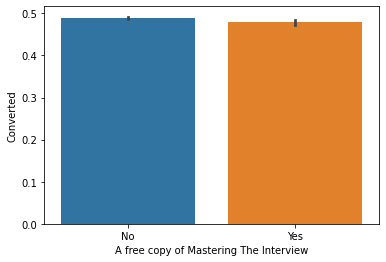

In [230]:
sns.barplot(x ='A free copy of Mastering The Interview', y ='Converted', data =lead, estimator = np.std)

Getting & Not getting a free copy of mastering the interview, has equal impact. So, not of much importance.

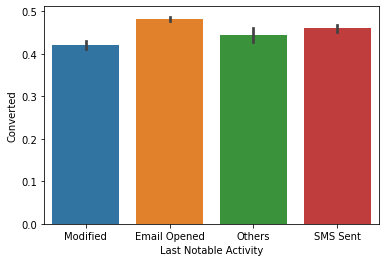

In [231]:
sns.barplot(x ='Last Notable Activity', y ='Converted', data =lead, estimator = np.std)

**Checking correlations**

In [232]:
lead.corr()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Lead Number,1.000000,0.025157,0.039808,0.020329,0.060703
Converted,0.025157,1.000000,0.045167,0.362483,-0.002672
TotalVisits,0.039808,0.045167,1.000000,0.326152,0.706151
Total Time Spent on Website,0.020329,0.362483,0.326152,1.000000,0.338886
Page Views Per Visit,0.060703,-0.002672,0.706151,0.338886,1.000000


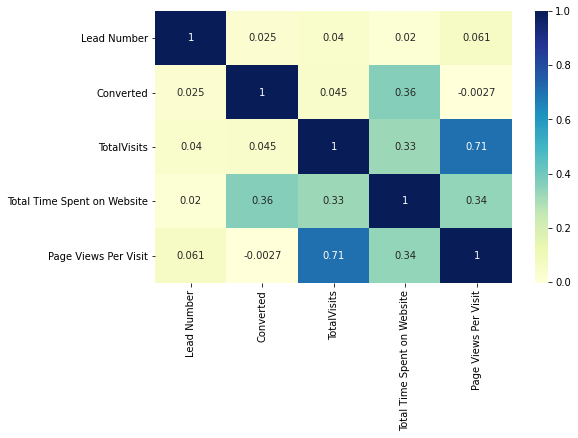

In [233]:
#Plotting heatmap for better visualisation on collinearity
plt.figure(figsize = (8,5))
sns.heatmap(lead.corr(), cmap="YlGnBu", annot = True)
plt.show()

We see extremely high correlation between **Page Views Per Visit** and **TotalVisits** variables. Hence, we'll drop *Page Views Per Visit* from dataset to avoid redundancy.

In [234]:
lead = lead.drop('Page Views Per Visit', axis=1)
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Last Activity,Specialization,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,Page Visited on Website,Missing,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,Email Opened,Missing,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,Email Opened,Business Administration,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,Others,Media and Advertising,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,Converted to Lead,Missing,No,Modified


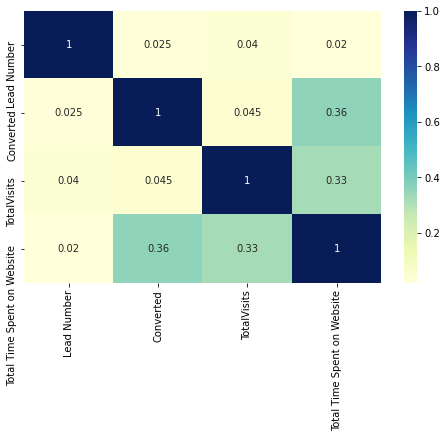

In [235]:
#Plotting heatmap again to check collinearity
plt.figure(figsize = (8,5))
sns.heatmap(lead.corr(), cmap="YlGnBu", annot = True)
plt.show()

We see variable *Total Time Spent on Website* is highly correlated to target variable *Converted* with 0.36. 

###**Visualizing categorical variables**

Below are the categorical variables which need to be checked against target variable *Converted*

*  Lead Origin
*  Lead Source
*  Last Activity
*  Specialization
*  Tags
*  A free copy of Mastering The Interview
*  Last Notable Activity

Since the dataset is large, we'll plot them after scaling.

## **Step 4: Data Preparation**

In [236]:
#checking Dataset
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Last Activity,Specialization,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,Page Visited on Website,Missing,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,Email Opened,Missing,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,Email Opened,Business Administration,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,Others,Media and Advertising,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,Converted to Lead,Missing,No,Modified


In [237]:
#checking data info
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9240 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   A free copy of Mastering The Interview  9240 non-null   object 
 10  Last Notable Activity                   9240 non-null   obje

**So we have 8 columns of obj data types & 4 numerical types.** 

In order to fit a regression line, we would need numerical values and not string.Hence,we need to change the datatypes of all string variables to numeric in dataset. This will be done by dummy variable creation for categorical columns.

These categorical columns are :
 * Prospect ID
 * Lead Origin
 * Lead Source
 * Last Activity
 * Specialization
 * Tags
 * A free copy of Mastering The Interview
 * Last Notable Activity

In [238]:
#finding number of unique values in each column to check if its categorical or continuous
lead.nunique().sort_values() 

Converted                                    2
A free copy of Mastering The Interview       2
Lead Origin                                  3
Last Notable Activity                        4
Lead Source                                  6
Last Activity                                6
TotalVisits                                 19
Specialization                              19
Total Time Spent on Website               1731
Prospect ID                               9240
Lead Number                               9240
dtype: int64

###**4a) Create Dummies for all categorical variables**

Checking unique values in all these category columns & forming dummy variables for it.

We'll use the pandas function *get_dummies* to perform this translation and generate the feature matrix lead_status

In [239]:
# Getting the dummy variables for the all the categorical variables and store it in a new dataframe lead_status
lead_status = pd.get_dummies(lead[['Lead Origin','Lead Source','Last Activity','Specialization','A free copy of Mastering The Interview','Last Notable Activity']])
lead_status.head()

,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Missing,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,A free copy of Mastering The Interview_No,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent
0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
2,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
4,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0


In [240]:
#checking columns in this new dataset
lead_status.columns

Index(['Lead Origin_API', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Others', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Last Activity_Converted to Lead',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_Page Visited on Website',
       'Last Activity_SMS Sent',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specia

In [241]:
#checking the number of columns in this
lead_status.shape[1]

40

So, we have 40 columns in the lead_status dataset, which has redundant columns as well. 

Now, we need to delete the cols which are redundant from each categorical column that we created dummies for above. 

In [242]:
cols_to_drop=['Lead Origin_Others','Lead Source_Others','Last Activity_Others','Specialization_Missing','Last Notable Activity_Others','A free copy of Mastering The Interview_No']
for col in cols_to_drop:
  lead_status.drop(col,axis=1, inplace=True)

lead_status.head()

,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


So, now we have dropped redundant columns created during get_dummies operation. Checking cols left now.

In [243]:
lead_status.shape[1]

34

In [244]:
# Adding the results to the original Bikes_data dataframe
lead = pd.concat([lead, lead_status], axis = 1)
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Last Activity,Specialization,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,Page Visited on Website,Missing,No,Modified,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,Email Opened,Missing,No,Email Opened,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,Email Opened,Business Administration,Yes,Email Opened,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,Others,Media and Advertising,No,Modified,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,Converted to Lead,Missing,No,Modified,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [245]:
#checking datatypes of all columns again after performing concatenation.
lead.dtypes

Prospect ID                                          object
Lead Number                                           int64
Lead Origin                                          object
Lead Source                                          object
Converted                                             int64
TotalVisits                                         float64
Total Time Spent on Website                           int64
Last Activity                                        object
Specialization                                       object
A free copy of Mastering The Interview               object
Last Notable Activity                                object
Lead Origin_API                                       uint8
Lead Origin_Landing Page Submission                   uint8
Lead Source_Direct Traffic                            uint8
Lead Source_Google                                    uint8
Lead Source_Olark Chat                                uint8
Lead Source_Organic Search              

In [246]:
#Dropping all columns of object types, since they are already handled in dummy creation.
cols_to_drop=['Lead Origin','Lead Source','Last Activity','Specialization','A free copy of Mastering The Interview','Last Notable Activity']
for col in cols_to_drop:
  lead.drop(col,axis=1,inplace=True)

lead.head()

,Prospect ID,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0.0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5.0,674,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,2.0,1532,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,1.0,305,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,2.0,1428,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [247]:
lead.shape

(9240, 39)

In [248]:
lead.columns

Index(['Prospect ID', 'Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Lead Origin_API',
       'Lead Origin_Landing Page Submission', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Last Activity_Converted to Lead', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Manage

In [249]:
#to check datatypes of all columns to ensure we have all numerical datatypes to be fed to model.
lead.dtypes

Prospect ID                                          object
Lead Number                                           int64
Converted                                             int64
TotalVisits                                         float64
Total Time Spent on Website                           int64
Lead Origin_API                                       uint8
Lead Origin_Landing Page Submission                   uint8
Lead Source_Direct Traffic                            uint8
Lead Source_Google                                    uint8
Lead Source_Olark Chat                                uint8
Lead Source_Organic Search                            uint8
Lead Source_Reference                                 uint8
Last Activity_Converted to Lead                       uint8
Last Activity_Email Opened                            uint8
Last Activity_Olark Chat Conversation                 uint8
Last Activity_Page Visited on Website                 uint8
Last Activity_SMS Sent                  

So, our final dataframe is *lead* . All our datatypes are numerical & we have 39 columns to start with. So we are good.

###**4b) Perform test-train split**

In [250]:
#importing required packages to split the data into training & test dataset.
from sklearn.model_selection import train_test_split

# Putting feature variables to X
# Removing prospect id & lead number because they are unique identifiers. Removing 'Converted' because it is target variable.
X = lead.drop(['Prospect ID','Lead Number','Converted'], axis=1)  
X.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
0,0.0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,5.0,674,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2.0,1532,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3,1.0,305,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,2.0,1428,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [251]:
# Putting response variable to y
y = lead['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [252]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [253]:
#checking shape of both train & test datasets
print (X_train.shape)
print (X_test.shape)

(6468, 36)
(2772, 36)


So, we see that our training dataset(X_train) has 6468 rows which is 70% of our total rows of our original dataset (lead_main) and our test dataset (X_test) has 2772 rows which is 30% of the total dataset. And we are working with 36 variables in both dataset.

###**4c) Perform Scaling**

Now, in our dataset, we have two columns whose values are more than 1. These columns are :
* Total Time Spent on Website
* TotalVisits

ALl other numerical columns have values have small integer values ranging between 0 & 1.So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale.There are two common ways of rescaling:

1. Min-Max scaling (normalization) (all values between 0 & 1)
2. Standardisation (mean-0, sigma-1) 

We'll use min-max scaling to rescale the variables as it'll bring all values withing same range i.e. 0 & 1.

**MinMax Scaling**

In [254]:
#importing min-max scaler for performing scaling
from sklearn.preprocessing import MinMaxScaler

In [255]:
scaler = MinMaxScaler()

In [256]:
# Applying scaler() to all the above continuous columns which have values more than 1:Total Time Spent on Website & TotalVisits
# Other variables are already between 0 & 1. So we'll not rescale them.
num_vars = ['Total Time Spent on Website','TotalVisits']
scaler = MinMaxScaler()

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_train.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
1871,0.000000,0.000000,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
6795,0.235294,0.214349,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3516,0.294118,0.046655,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8105,0.294118,0.541373,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3934,0.000000,0.000000,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In this case, we have converted the values to get in range between 0 & 1.

In [257]:
#to confirm if all variables in same scale
X_train[num_vars].describe()

,Total Time Spent on Website,TotalVisits
count,6468.000000,6468.000000
mean,0.212974,0.196343
std,0.240566,0.191614
min,0.000000,0.000000
25%,0.005282,0.058824
50%,0.108275,0.176471
75%,0.407790,0.294118
max,1.000000,1.000000


###**4d) Checking correlations**



In [258]:
lead.corr()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
Lead Number,1.000000,0.025157,0.039808,0.020329,0.044136,-0.075012,-0.143405,0.131736,-0.068590,-0.020389,0.025042,0.013035,0.107735,0.002579,0.009524,-0.137925,0.001993,-0.008839,0.003296,-0.000594,-0.010096,-0.005607,0.002790,-0.010532,-0.031586,-0.011288,-0.001916,-0.015190,-0.010001,-0.011429,0.024602,-0.021392,-0.019434,-0.004434,-0.109696,0.076414,0.080591,-0.169987
Converted,0.025157,1.000000,0.045167,0.362483,-0.120822,-0.051236,-0.080682,0.027221,-0.129459,-0.005879,0.270830,-0.117383,-0.013850,-0.210809,-0.083771,0.325600,0.043518,0.025791,-0.002747,-0.006429,0.043308,0.030306,0.008190,0.047130,-0.001200,-0.007441,0.065853,0.010264,0.043272,-0.009755,0.007200,-0.014956,0.019245,-0.009457,-0.039820,-0.021955,-0.244294,0.351845
TotalVisits,0.039808,0.045167,1.000000,0.326152,-0.282936,0.406546,0.117822,0.169207,-0.447360,0.288626,-0.193681,-0.097803,0.048483,-0.197038,0.247447,0.006834,0.075955,0.064186,0.026521,0.037988,0.078192,0.051488,0.026791,0.085801,0.045312,0.053750,0.039460,0.065769,0.038735,0.046517,0.048316,0.026362,0.058496,0.098705,0.279561,0.066324,-0.140604,0.006614
Total Time Spent on Website,0.020329,0.362483,0.326152,1.000000,-0.201239,0.276009,0.132926,0.199786,-0.376768,0.096123,-0.107361,-0.010555,0.019968,-0.191667,0.028051,0.117223,0.040574,0.053244,0.018988,0.001162,0.074260,0.027873,0.039611,0.063852,0.032481,0.022154,0.067445,0.040589,0.060720,0.027458,0.020672,0.002900,0.049050,0.042640,0.168298,0.009585,-0.106857,0.125076
Lead Origin_API,0.044136,-0.120822,-0.282936,-0.201239,1.000000,-0.842492,-0.435365,0.015723,0.607716,0.005972,-0.196968,-0.005102,-0.050978,0.366231,-0.064716,-0.125686,-0.108819,-0.128504,-0.056984,-0.073885,-0.208988,-0.069362,-0.060714,-0.173557,-0.129624,-0.083987,-0.146734,-0.084341,-0.118367,-0.066011,-0.048388,-0.042290,-0.114453,-0.091919,-0.475875,-0.047394,0.105432,-0.103486
Lead Origin_Landing Page Submission,-0.075012,-0.051236,0.406546,0.276009,-0.842492,1.000000,0.528303,0.081450,-0.512950,0.057567,-0.262358,0.041962,0.028583,-0.303385,0.092714,0.068547,0.105408,0.133649,0.063297,0.078808,0.199558,0.058223,0.054441,0.155891,0.148359,0.096023,0.129763,0.101548,0.126161,0.077786,0.057301,0.049035,0.126752,0.111901,0.569633,0.070159,-0.101822,0.057507
Lead Source_Direct Traffic,-0.143405,-0.080682,0.117822,0.132926,-0.435365,0.528303,1.000000,-0.417180,-0.298384,-0.232793,-0.152614,0.063650,0.008341,-0.171932,0.065720,0.017250,0.058056,0.066546,0.041200,0.073465,0.090971,0.039579,0.016739,0.060109,0.122091,0.042331,0.064441,0.020054,0.066824,0.029224,0.027122,0.055332,0.104164,0.020054,0.598655,0.033109,-0.053070,0.018989
Lead Source_Google,0.131736,0.027221,0.169207,0.199786,0.015723,0.081450,-0.417180,1.000000,-0.327818,-0.255757,-0.167669,0.027159,0.021305,-0.087952,0.016396,0.022593,0.010893,0

In [259]:
lead.corr()<-0.4

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
Lead Number,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Converted,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
TotalVisits,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Total Time Spent on Website,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Lead Origin_API,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
Lead Origin_Landing Page Submission,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Lead Source_Direct Traffic,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Lead Source_Google,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Lead Source_Olark Chat,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Lead Source_Organic Search,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


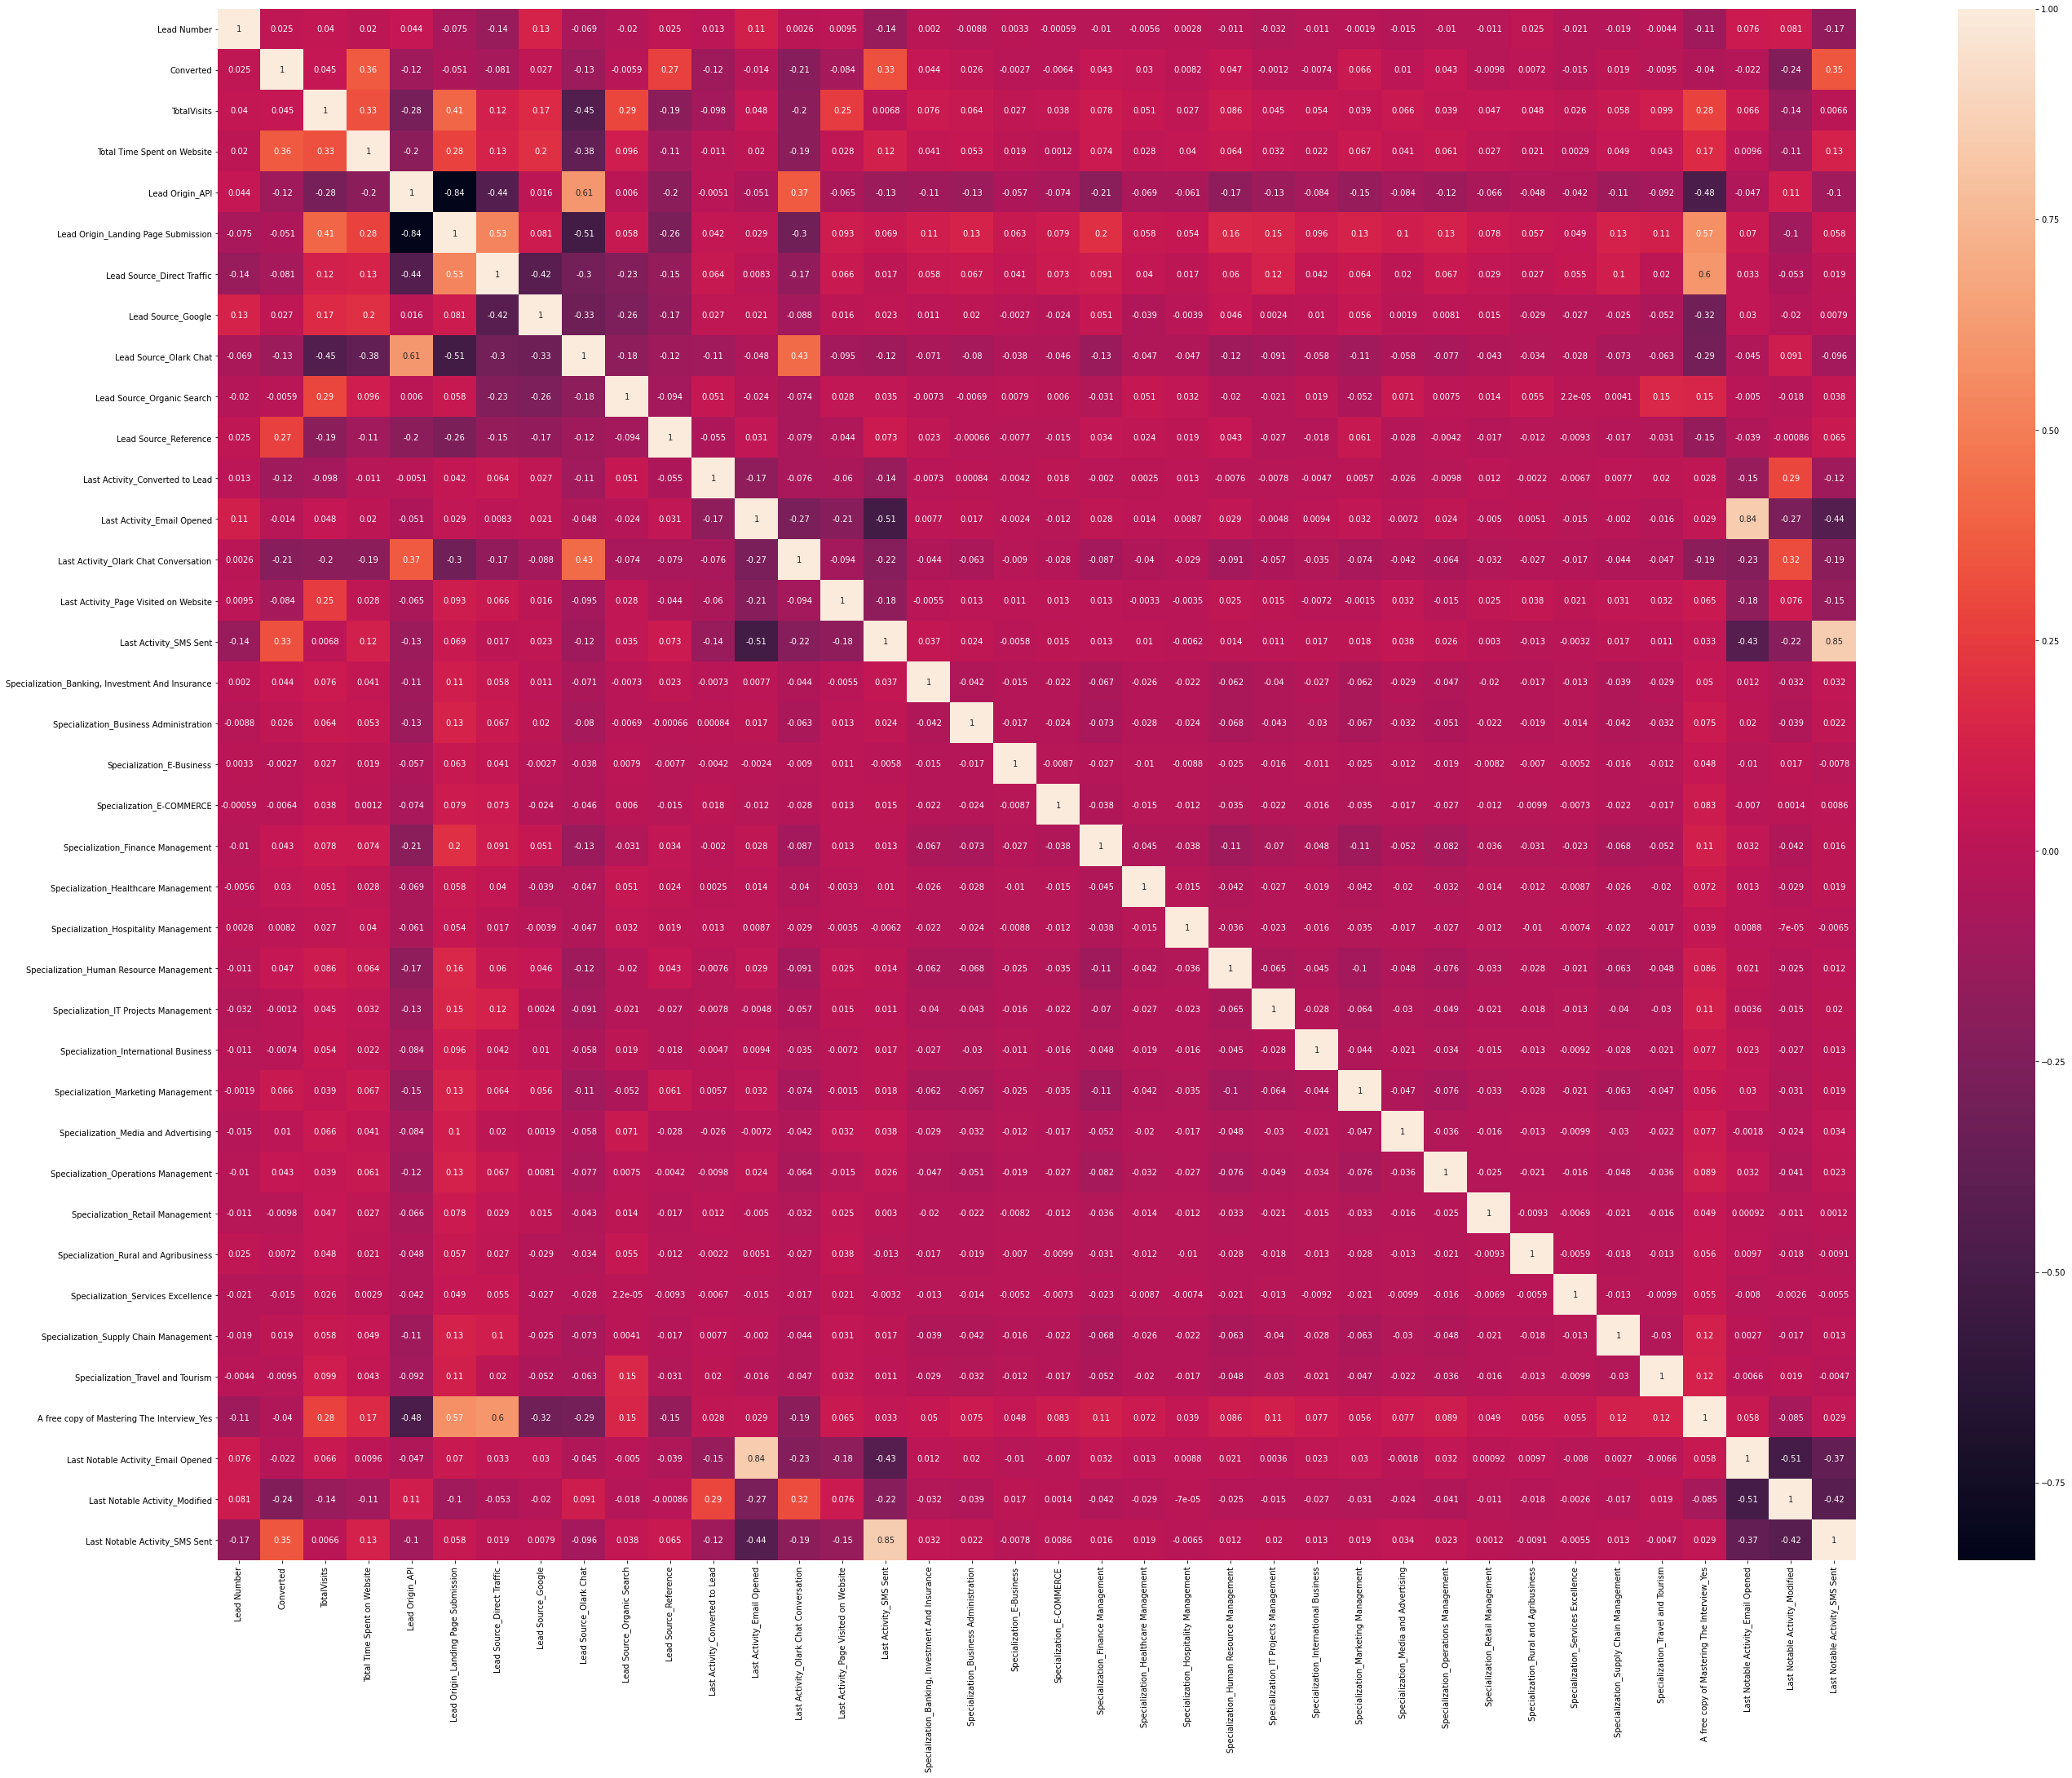

In [260]:
# Checking the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (45,35))
sns.heatmap(lead.corr(), annot = True)
plt.show()

We see there is high collinearity between 
* Last Notable Activity_Email Opened & Last Activity_Email Opened (84%)
* Last Notable Activity_SMS Sent vs Last Activity_SMS Sent (85%)

Last Notable Activity & Last Activity deal with same information, with only diff being first one is done by customer but noted by sales team & second one by Customer. Since we are highly intersted from customer perspective in this business problem, we'll just hold Last Activity columns & drop Last Notable Activity column, to avoid redundancy. 

In [261]:
#Dropping Last Notable Activity_SMS Sent & Last Notable Activity_Email Opened
X_test = X_test.drop(['Last Notable Activity_SMS Sent','Last Notable Activity_Email Opened','Lead Origin_API','A free copy of Mastering The Interview_Yes'],1)
X_train = X_train.drop(['Last Notable Activity_SMS Sent','Last Notable Activity_Email Opened','Lead Origin_API','A free copy of Mastering The Interview_Yes'],1)

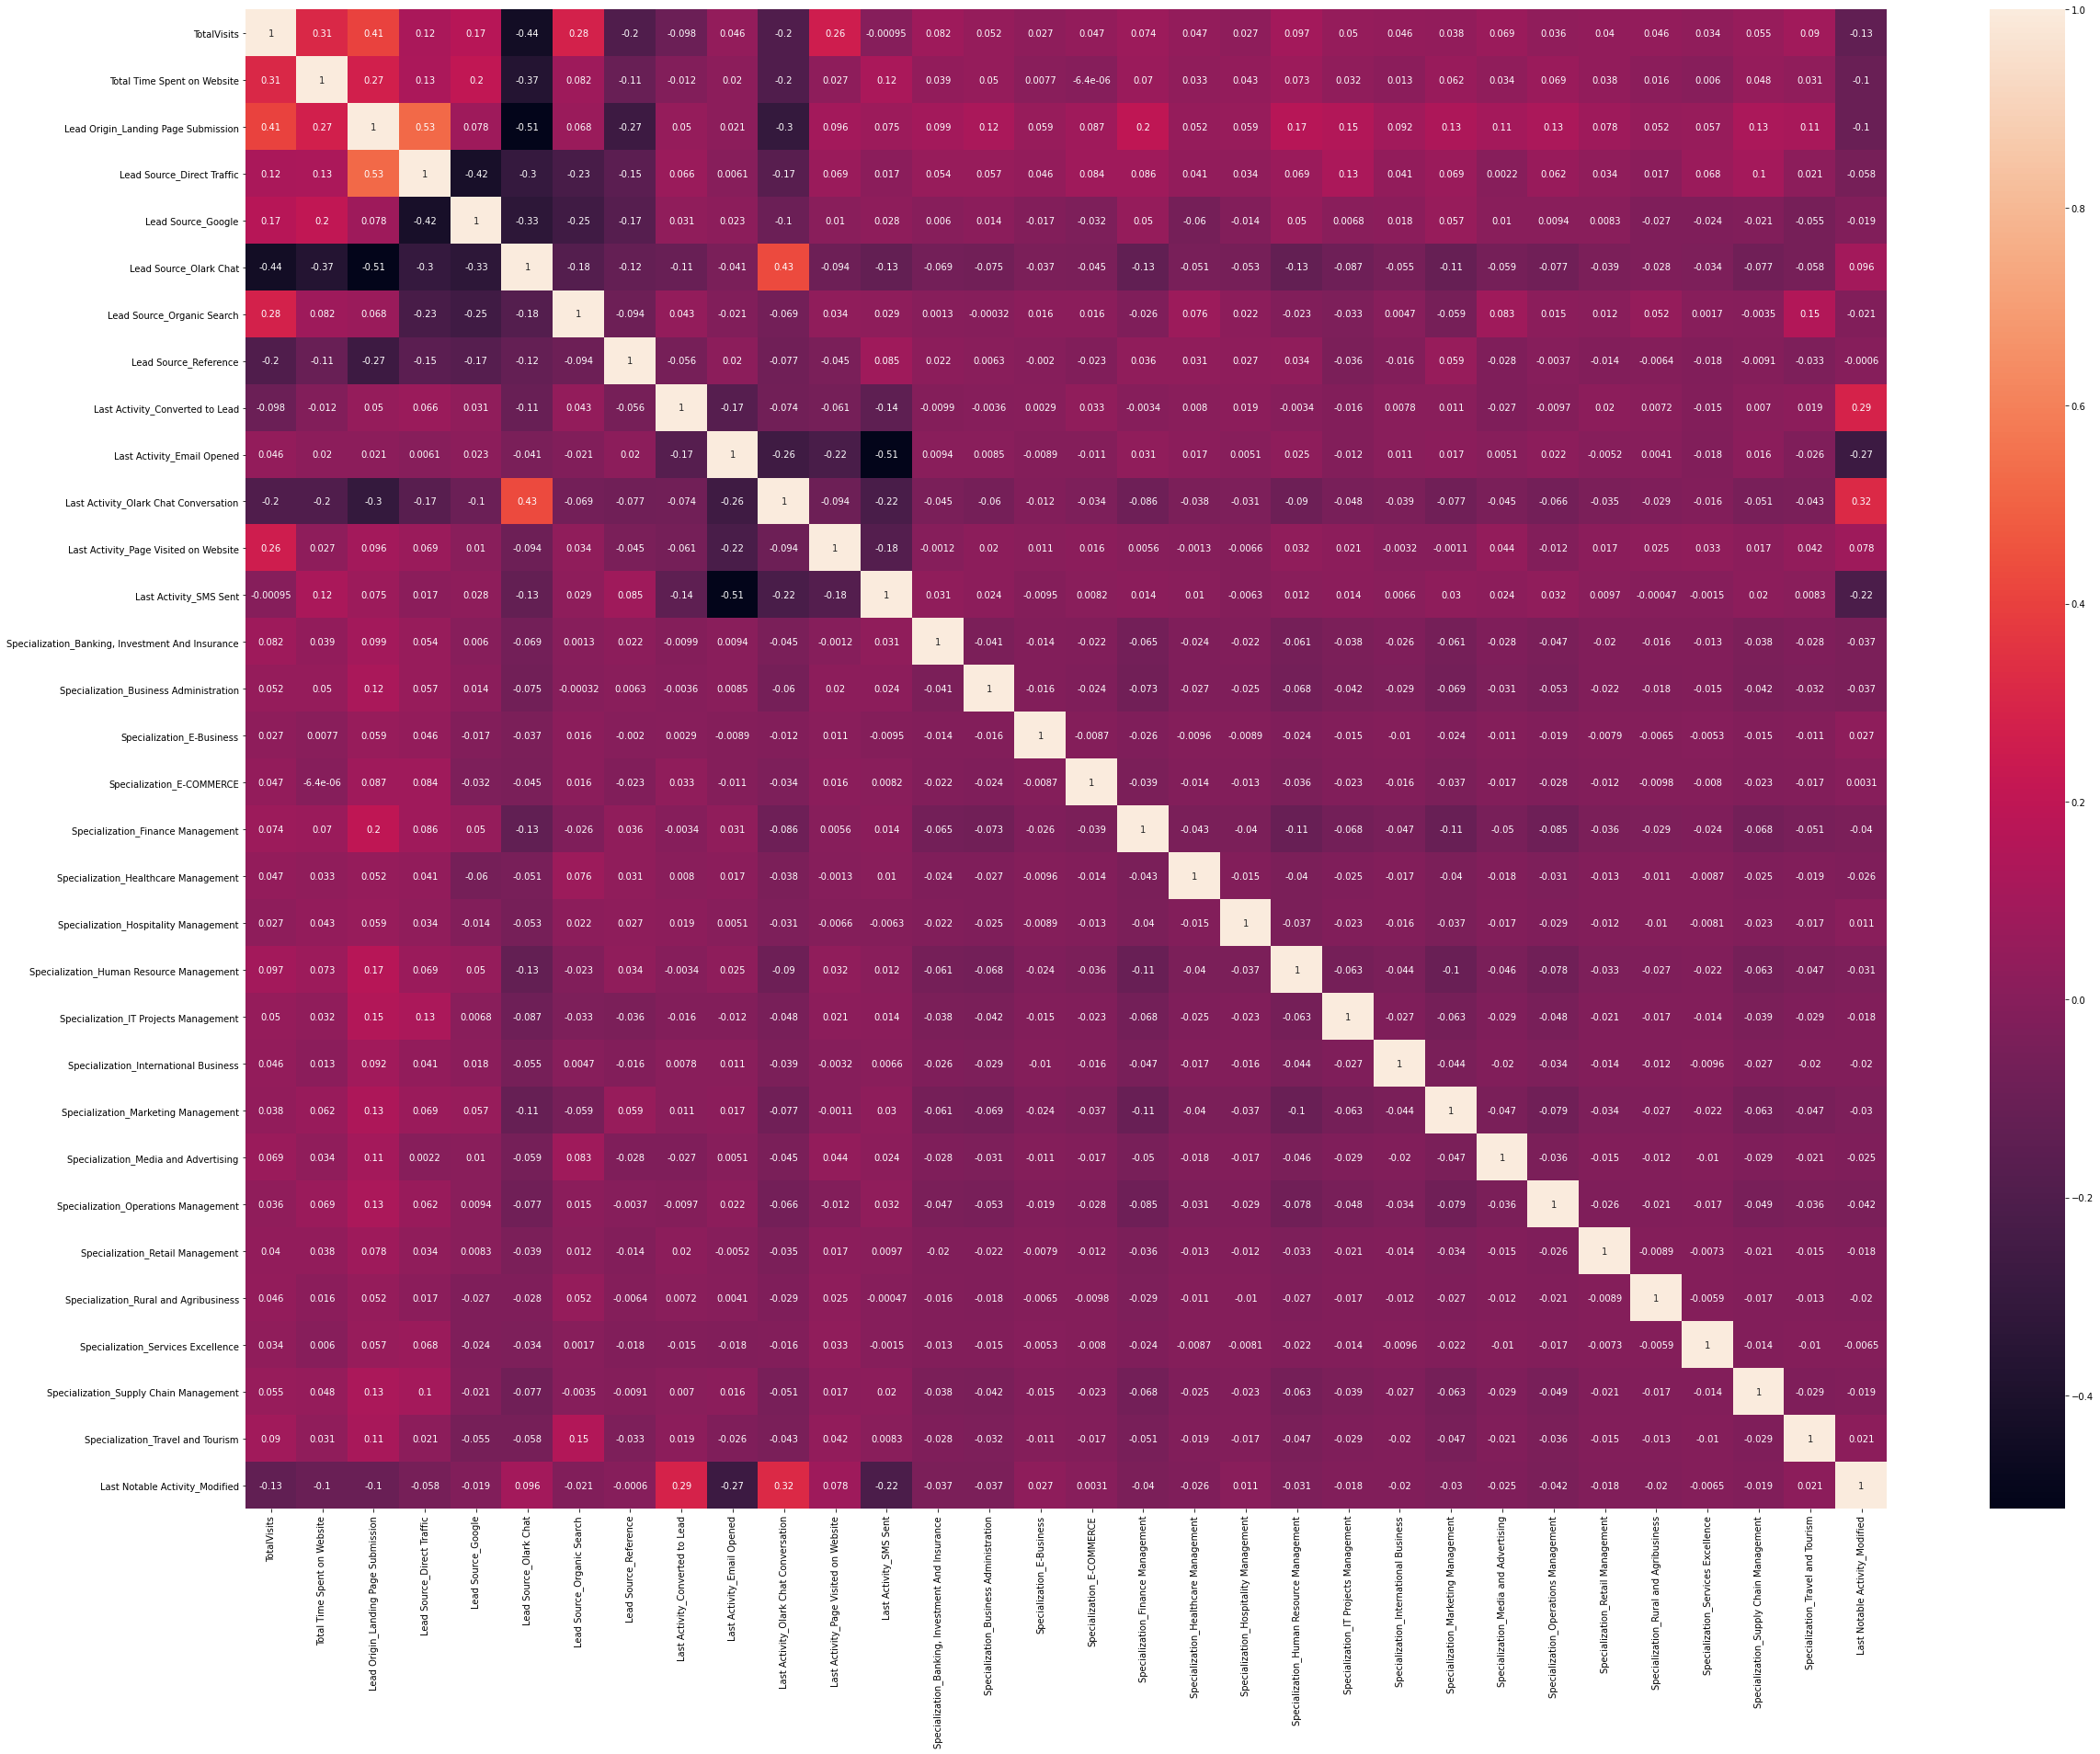

In [262]:
# Checking the correlation heatmap again

plt.figure(figsize = (40, 30))
sns.heatmap(X_train.corr(), annot = True)
plt.show()

##**Step 5: Model Building**

**Building model using statsmodel, for the detailed statistics**

In [263]:
#importing statsmodel.api for statistical analysis
import statsmodels.api as sm  

In [264]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6435
Model Family:                Binomial   Df Model:                           32
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2905.5
Date:                Mon, 07 Sep 2020   Deviance:                       5811.0
Time:                        17:52:23   Pearson chi2:                 6.60e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -0.8645      0.194     -4.451      0.000      -1.245      -0.484
TotalVisits                                          0.2801      0.212      1.318      0.187      -0.136       0.696
Total Time Spent on Website                          4.3274      0.158     27.320      0.000       4.017       4.638
Lead Origin_Landing Page Submission                 -1.3216      0.128    -10.354      0.000      -1.572      -1.071
Lead Source_Direct Traffic                          -1.7659      0.179     -9.869      0.000      -2.117      -1.415
Lead Source_Google                                  -1.3999      0.165     -8.484      0.000      -1.723      -1.076
Lead Source_Olark Chat                              -0.6244      0.170     -3.676      0.000      -0.957      -0.291
Lead Source_Organic Search                          -1.6624      0.183     -9.067      0.000      -2.022      -1.303
Lead Source_Reference                                1.6567      0.248      6.691      0.000       1.171       2.142
Last Activity_Converted to Lead                     -0.1114      0.237     -0.471      0.638      -0.575       0.352
Last Activity_Email Opened                           0.3217      0.130      2.474      0.013       0.067       0.577
Last Activity_Olark Chat Conversation               -0.7334      0.199     -3.683      0.000      -1.124      -0.343
Last Activity_Page Visited on Website               -0.1537      0.179     -0.857      0.391      -0.505       0.198
Last Activity_SMS Sent                               1.5322      0.131     11.659      0.000       1.275       1.790
Specialization_Banking, Investment And Insurance     1.4986      0.205      7.299      0.000       1.096       1.901
Specialization_Business Administration               1.2733      0.188      6.758      0.000       0.904       1.643
Specialization_E-Business                            1.3919      0.478      2.913      0.004       0.455       2.328
Specialization_E-COMMERCE                            1.6414      0.307      5.341      0.000       1.039       2.244
Specialization_Finance Management                    1.5862      0.150     10.560      0.000       1.292       1.881
Specialization_Healthcare Management                 1.6704      0.278      6.018      0.000       1.126       2.214
Specialization_Hospitality Management                0.4574      0.320      1.431      0.152      -0.169       1.084
Specialization_Human Resource Management             1.3631      0.152      8.945      0.000       1.064       1.662
Specialization_IT Projects Management                1.5422      0.203      7.586      0.000       1.144       1.941
Specialization_International Business    

In this table, our key focus area is just the different coefficients and their respective p-values. As you can see, there are many variables whose p-values are high, implying that that variable is statistically insignificant. So we need to eliminate some of the variables in order to build a better model.

We'll first eliminate a few features using Recursive Feature Elimination (RFE), and once we have reached a small set of variables to work with, we can then use manual feature elimination (i.e. manually eliminating features based on observing the p-values and VIFs).

###**5a) Feature Selection Using RFE**

In [265]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [266]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [267]:
rfe.support_

array([False,  True,  True,  True,  True, False,  True,  True, False,
       False,  True, False,  True,  True, False, False,  True,  True,
        True, False,  True,  True, False,  True,  True,  True, False,
        True, False,  True, False,  True])

In [268]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 10),
 ('Total Time Spent on Website', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', False, 8),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Last Activity_Converted to Lead', False, 13),
 ('Last Activity_Email Opened', False, 9),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Page Visited on Website', False, 12),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Banking, Investment And Insurance', True, 1),
 ('Specialization_Business Administration', False, 2),
 ('Specialization_E-Business', False, 4),
 ('Specialization_E-COMMERCE', True, 1),
 ('Specialization_Finance Management', True, 1),
 ('Specialization_Healthcare Management', True, 1),
 ('Specialization_Hospitality Management', False, 11),
 ('Specialization_Human Resource Management', True, 1),
 ('Specialization_IT Projects M

In [269]:
col = X_train.columns[rfe.support_]

In [270]:
#columns with rfe support false
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Lead Source_Olark Chat',
       'Last Activity_Converted to Lead', 'Last Activity_Email Opened',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_Hospitality Management',
       'Specialization_International Business',
       'Specialization_Retail Management',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism'],
      dtype='object')

###**Model 1: 20 variables**

In [271]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2954.8
Date:                Mon, 07 Sep 2020   Deviance:                       5909.6
Time:                        17:52:25   Pearson chi2:                 6.71e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -0.9600      0.078    -12.302      0.000      -1.113      -0.807
Total Time Spent on Website                          4.4725      0.156     28.642      0.000       4.166       4.779
Lead Origin_Landing Page Submission                 -0.7572      0.105     -7.240      0.000      -0.962      -0.552
Lead Source_Direct Traffic                          -1.3024      0.132     -9.882      0.000      -1.561      -1.044
Lead Source_Google                                  -0.8988      0.109     -8.224      0.000      -1.113      -0.685
Lead Source_Organic Search                          -1.1210      0.132     -8.474      0.000      -1.380      -0.862
Lead Source_Reference                                2.4697      0.205     12.028      0.000       2.067       2.872
Last Activity_Olark Chat Conversation               -1.0202      0.165     -6.191      0.000      -1.343      -0.697
Last Activity_SMS Sent                               1.2992      0.070     18.596      0.000       1.162       1.436
Specialization_Banking, Investment And Insurance     0.9141      0.185      4.938      0.000       0.551       1.277
Specialization_E-COMMERCE                            0.9951      0.290      3.428      0.001       0.426       1.564
Specialization_Finance Management                    0.9713      0.123      7.906      0.000       0.730       1.212
Specialization_Healthcare Management                 1.0928      0.259      4.215      0.000       0.585       1.601
Specialization_Human Resource Management             0.7628      0.126      6.049      0.000       0.516       1.010
Specialization_IT Projects Management                0.9003      0.183      4.911      0.000       0.541       1.260
Specialization_Marketing Management                  0.7741      0.125      6.186      0.000       0.529       1.019
Specialization_Media and Advertising                 0.8384      0.223      3.760      0.000       0.401       1.275
Specialization_Operations Management                 0.8616      0.150      5.752      0.000       0.568       1.155
Specialization_Rural and Agribusiness                1.1674      0.370      3.151      0.002       0.441       1.893
Specialization_Supply Chain Management               0.7935      0.176      4.510      0.000       0.449       1.138
Last Notable Activity_Modified                      -0.9432      0.075    -12.615      0.000      -1.090      -0.797
====================================================================================================================
"""

In [272]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.453648
6795    0.112949
3516    0.320523
8105    0.751082
3934    0.129738
4844    0.774913
3297    0.181891
8071    0.775165
987     0.425819
7423    0.925335
dtype: float64

In [273]:
y_train_pred = y_train_pred.values.reshape(-1)#creating a 1s array of y pred values
y_train_pred[:10]

array([0.45364762, 0.11294912, 0.32052253, 0.75108181, 0.12973802,
       0.77491308, 0.18189077, 0.77516453, 0.42581892, 0.92533546])

Creating a dataframe with the actual converted flag and the predicted probabilities

In [274]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.453648,1871
1,0,0.112949,6795
2,0,0.320523,3516
3,0,0.751082,8105
4,0,0.129738,3934


Creating new column 'Predicted' with 1 if Converted_Prob > 0.5 else 0. Choosing this cutoff randomly as of now, since we need high sensitivity. So keeping it low.

In [275]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
0,0,0.453648,1871,0
1,0,0.112949,6795,0
2,0,0.320523,3516,0
3,0,0.751082,8105,1
4,0,0.129738,3934,0


###**Confusion Matrix & Accuracy**

Accuracy=Correctly Predicted Labels / Total Number of Labels.

In [276]:
from sklearn import metrics

In [277]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3497  505]
 [ 843 1623]]


In [278]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7915893630179345


So our model's accuracy score is 79.7%. But we need to increase our accuracy to more than 80%. So, we might need to change our cut off value.So, we'll try this again with a low cutoff.

**Checking VIF**

In [279]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [280]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,5.54
2,Lead Source_Direct Traffic,3.61
3,Lead Source_Google,2.70
0,Total Time Spent on Website,2.16
4,Lead Source_Organic Search,1.66
19,Last Notable Activity_Modified,1.65
10,Specialization_Finance Management,1.49
7,Last Activity_SMS Sent,1.44
12,Specialization_Human Resource Management,1.41
14,Specialization_Marketing Management,1.39


There is one variable with high VIF. i.e. '*Lead Origin_Landing Page Submission.* It's best to drop this variable as it isn't helping much with prediction and unnecessarily making the model complex.

In [281]:
#dropping Lead Origin_Landing Page Submission column
col = col.drop('Lead Origin_Landing Page Submission', 1)
col

Index(['Total Time Spent on Website', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Supply Chain Management',
       'Last Notable Activity_Modified'],
      dtype='object')

###**Model 2: 19 Variables**

In [282]:
# Running model again with 19 variables.
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2981.5
Date:                Mon, 07 Sep 2020   Deviance:                       5962.9
Time:                        17:52:25   Pearson chi2:                 6.74e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -0.9393      0.078    -12.095      0.000      -1.092      -0.787
Total Time Spent on Website                          4.4480      0.155     28.647      0.000       4.144       4.752
Lead Source_Direct Traffic                          -1.8059      0.114    -15.899      0.000      -2.029      -1.583
Lead Source_Google                                  -1.1984      0.102    -11.693      0.000      -1.399      -0.998
Lead Source_Organic Search                          -1.4534      0.125    -11.628      0.000      -1.698      -1.208
Lead Source_Reference                                2.6115      0.204     12.795      0.000       2.212       3.012
Last Activity_Olark Chat Conversation               -0.9590      0.164     -5.846      0.000      -1.281      -0.637
Last Activity_SMS Sent                               1.2758      0.069     18.413      0.000       1.140       1.412
Specialization_Banking, Investment And Insurance     0.6345      0.179      3.546      0.000       0.284       0.985
Specialization_E-COMMERCE                            0.7023      0.284      2.471      0.013       0.145       1.259
Specialization_Finance Management                    0.6645      0.114      5.834      0.000       0.441       0.888
Specialization_Healthcare Management                 0.8416      0.255      3.306      0.001       0.343       1.341
Specialization_Human Resource Management             0.4697      0.118      3.981      0.000       0.238       0.701
Specialization_IT Projects Management                0.6074      0.178      3.412      0.001       0.259       0.956
Specialization_Marketing Management                  0.5195      0.119      4.377      0.000       0.287       0.752
Specialization_Media and Advertising                 0.4976      0.219      2.275      0.023       0.069       0.926
Specialization_Operations Management                 0.5814      0.143      4.077      0.000       0.302       0.861
Specialization_Rural and Agribusiness                0.8436      0.364      2.315      0.021       0.129       1.558
Specialization_Supply Chain Management               0.5076      0.170      2.986      0.003       0.174       0.841
Last Notable Activity_Modified                      -0.9443      0.074    -12.720      0.000      -1.090      -0.799
====================================================================================================================
"""

In [283]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [284]:
y_train_pred[:10]

array([0.39657295, 0.14285651, 0.32480336, 0.82436132, 0.13197766,
       0.81324093, 0.20057742, 0.80147763, 0.42849067, 0.90007997])

In [285]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [286]:
# Creating new column 'Predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()


,Converted,Converted_Prob,Prospect ID,Predicted
0,0,0.396573,1871,0
1,0,0.142857,6795,0
2,0,0.324803,3516,0
3,0,0.824361,8105,1
4,0,0.131978,3934,0


In [287]:
# Checking the overall accuracy again
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.786178107606679


Our accuracy score has dropped to 77.9%. Checking VIF now.

In [288]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Source_Direct Traffic,2.29
2,Lead Source_Google,2.22
0,Total Time Spent on Website,2.16
18,Last Notable Activity_Modified,1.65
6,Last Activity_SMS Sent,1.44
3,Lead Source_Organic Search,1.41
9,Specialization_Finance Management,1.33
13,Specialization_Marketing Management,1.29
11,Specialization_Human Resource Management,1.28
5,Last Activity_Olark Chat Conversation,1.26


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

##**Steps 6: Model Evaluation**

There are few more metrics beyond accuracy that are essential to evaluate the performance of a logistic regression model. These are:

*  Accuracy,
*  Sensitivity, specificity and the ROC curve
*  Precision and Recall

Once we've chosen the optimal scenario based on the evaluation metrics, we'll finally go on and make predictions on the test dataset and see how our model performs there as well.

**Metrices beyond Accuracy**

In [289]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [290]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6581508515815085

In [291]:
# Let us calculate specificity
TN / float(TN+FP)

0.8738130934532734

In [292]:
# Calculate false postive rate - predicting lead when customer doesn't gets converted to lead
print(FP/ float(TN+FP))

0.12618690654672662


In [293]:
# positive predictive value 
print (TP / float(TP+FP))

0.762687969924812


In [294]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8057603686635945


###**Step 7: Plotting the ROC Curve**

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [295]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [296]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

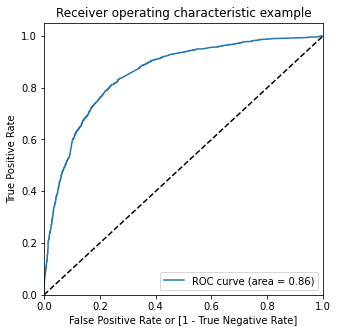

In [297]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

ROC curve looks fine. 

###**Step 8: Finding Optimal Cutoff Point**
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [298]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.396573,1871,0,1,1,1,1,0,0,0,0,0,0
1,0,0.142857,6795,0,1,1,0,0,0,0,0,0,0,0
2,0,0.324803,3516,0,1,1,1,1,0,0,0,0,0,0
3,0,0.824361,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.131978,3934,0,1,1,0,0,0,0,0,0,0,0


In [299]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.555504  0.973236  0.298101
0.2   0.2  0.702845  0.920519  0.568716
0.3   0.3  0.770563  0.824006  0.737631
0.4   0.4  0.787415  0.740470  0.816342
0.5   0.5  0.786178  0.656529  0.866067
0.6   0.6  0.765461  0.522303  0.915292
0.7   0.7  0.749382  0.431873  0.945027
0.8   0.8  0.718615  0.314274  0.967766
0.9   0.9  0.673779  0.165450  0.987006


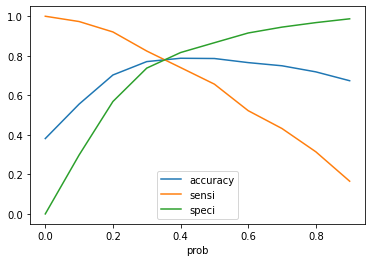

In [300]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As we can see, when the probability thresholds are very low, the sensitivity is very high and specificity is very low. Similarly, for larger probability thresholds, the sensitivity values are very low but the specificity values are very high. And at about 0.3, the three metrics seem to be almost equal with decent values and hence, we choose 0.3 as the optimal cut-off point. The following graph also showcases that at about 0.3, the three metrics intersect.

Also as per our business requirement, we need sensitivity more than 80%, so we'll choose optimal cutoff point as 0.3

From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [301]:
# Creating new column 'Final Predicted' with 1 if Converted_Prob > 0.3 else 0
y_train_pred_final['Final_Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,0,0.396573,1871,0,1,1,1,1,0,0,0,0,0,0,1
1,0,0.142857,6795,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.324803,3516,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.824361,8105,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.131978,3934,0,1,1,0,0,0,0,0,0,0,0,0


In [302]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

0.7705627705627706

In [303]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)
confusion2

array([[2952, 1050],
       [ 434, 2032]])

In [304]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [305]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8240064882400648

In [306]:
# Let us calculate specificity
TN / float(TN+FP)

0.7376311844077961

In [307]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.2623688155922039


In [308]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6593121349772875


In [309]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8718251624335499


###**Step 9: Precision & Recall**

In [310]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion

array([[3466,  536],
       [ 847, 1619]])

Precision
TP / TP + FP

In [311]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7512761020881671

In [312]:
from sklearn.metrics import precision_score, recall_score

In [313]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7512761020881671

In [314]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.6565287915652879

In [315]:
from sklearn.metrics import precision_recall_curve

In [316]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

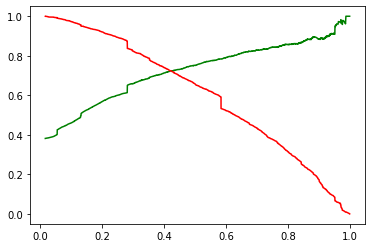

In [317]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

As we can see, the curve is similar to what we got for sensitivity and specificity. Except now, the curve for precision is quite jumpy towards the end. This is because the denominator of precision, i.e. 
(TP+FP) is not constant as these are the predicted values of 1s. And because the predicted values can swing wildly, we get a very jumpy curve.

###**Step 10: Making predictions on the test set**

In [318]:
num_vars = ['Total Time Spent on Website','TotalVisits']
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])
X_train.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Last Notable Activity_Modified
1871,0.000000,0.000000,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6795,0.235294,0.214349,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3516,0.294118,0.046655,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8105,0.294118,0.541373,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3934,0.000000,0.000000,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [319]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Reference,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Rural and Agribusiness,Specialization_Supply Chain Management,Last Notable Activity_Modified
4269,0.448735,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2376,0.000000,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7766,0.026187,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9199,0.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4359,0.000000,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [320]:
X_test_sm = sm.add_constant(X_test)

In [321]:
#making predictions on test dataset
y_test_pred = res.predict(X_test_sm)

In [322]:
y_test_pred[:10]

4269    0.628699
2376    0.950173
7766    0.180398
9199    0.055065
4359    0.899509
9186    0.727288
1631    0.628729
8963    0.166782
8007    0.149529
5324    0.480939
dtype: float64

In [323]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [324]:
# checking top 5 contents
y_pred_1.head()

,0
4269,0.628699
2376,0.950173
7766,0.180398
9199,0.055065
4359,0.899509


In [325]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [326]:
# Putting Propsect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [327]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [328]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [329]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.628699
1,1,2376,0.950173
2,1,7766,0.180398
3,0,9199,0.055065
4,1,4359,0.899509


In [330]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [331]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_Prob'])

In [332]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,4269,1,0.628699
1,2376,1,0.950173
2,7766,1,0.180398
3,9199,0,0.055065
4,4359,1,0.899509


In [333]:
y_pred_final['Final_Predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [334]:
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,Final_Predicted
0,4269,1,0.628699,1
1,2376,1,0.950173,1
2,7766,1,0.180398,0
3,9199,0,0.055065,0
4,4359,1,0.899509,1


In [335]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_Predicted)

0.7683982683982684

In [336]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_Predicted)
confusion2

array([[1242,  435],
       [ 207,  888]])

In [337]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [338]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.810958904109589

In [339]:
# Let us calculate specificity
TN / float(TN+FP)

0.740608228980322

In [340]:
#checkign precision score
precision_score(y_pred_final.Converted, y_pred_final.Final_Predicted)

0.671201814058957

In [341]:
#checkign recall score
recall_score(y_pred_final.Converted, y_pred_final.Final_Predicted)

0.810958904109589

The metrics seem to hold on the test dataset as well. So, it looks like we have created a decent model for the lead dataset as the metrics are decent for both the training and test datasets.


###**Finding Lead Score**

In [342]:
y_pred_final['Lead Score']=round(y_pred_final['Converted_Prob']*100,2)

In [343]:
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,Final_Predicted,Lead Score
0,4269,1,0.628699,1,62.87
1,2376,1,0.950173,1,95.02
2,7766,1,0.180398,0,18.04
3,9199,0,0.055065,0,5.51
4,4359,1,0.899509,1,89.95


##**Conclusion**

Finally we are done with our model & we have following output.
* Created model using 17 variables
* Sensitivity: 82% (train) & 81%(test)
* Specificity 73% (train) & 74%(test)
* Accuracy: 77%(train) &  76.8%(test)
* Precison score: 75%(train) & 67%(test)
* Recall score: 65%(train) & 81%(recall)

THough our model passed 81% sensitivity mark, we need to improve it to get better preciison score & accuracy.